<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/04_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.datasets import fetch_openml
from scipy import stats


# Load the "Adult" dataset from OpenML
adult = fetch_openml(name='adult', version=2, as_frame=True)
adult_data = adult.frame

# Data Preparation: Encode binary variables and filter relevant columns
adult_df = adult_data[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'sex', 'class', 'race']].copy()


In [2]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race
0,25,7,40,0,0,Male,<=50K,Black
1,38,9,50,0,0,Male,<=50K,White
2,28,12,40,0,0,Male,>50K,White
3,44,10,40,7688,0,Male,>50K,Black
4,18,10,30,0,0,Female,<=50K,White


In [3]:
df_2x2 = pd.crosstab(adult_df['sex'], adult_df['class'])
df_2x2

class,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


In [4]:
a = df_2x2.iloc[0,0]
b = df_2x2.iloc[0,1]
c = df_2x2.iloc[1,0]
d = df_2x2.iloc[1,1]

In [5]:
numerator = (a*d - b*c)
denominator = np.sqrt(np.longdouble(a+b) * np.longdouble(c+d) * np.longdouble(a+c) * np.longdouble(b+d))
phi_coefficient = numerator / denominator
phi_coefficient

0.2146280345639280344

In [6]:
def calculate_phi(x, y):
  df_2x2 = pd.crosstab(x, y)
  a = df_2x2.iloc[0,0]
  b = df_2x2.iloc[0,1]
  c = df_2x2.iloc[1,0]
  d = df_2x2.iloc[1,1]
  numerator = (a*d - b*c)
  denominator = np.sqrt(np.longdouble(a+b) * np.longdouble(c+d) * np.longdouble(a+c) * np.longdouble(b+d))
  return (numerator / denominator)

In [7]:
calculate_phi(adult_df['sex'], adult_df['class'])

0.2146280345639280344

In [8]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race
0,25,7,40,0,0,Male,<=50K,Black
1,38,9,50,0,0,Male,<=50K,White
2,28,12,40,0,0,Male,>50K,White
3,44,10,40,7688,0,Male,>50K,Black
4,18,10,30,0,0,Female,<=50K,White


In [9]:
adult_df['age'].describe()

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [10]:
def age_type(x):
  if x < 18:
    return 'young'
  elif x >= 18 and x <= 30:
    return 'adult'
  elif x > 30 and x <= 50:
    return 'middle_aged'
  elif x > 50 and x <= 70:
    return 'senior'
  else:
    return 'old'

adult_df['age_type'] = adult_df['age'].agg(age_type)

<ipython-input-10-0738830d4abd>:13: FutureWarning: using <function age_type at 0x789bd0285bd0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  adult_df['age_type'] = adult_df['age'].agg(age_type)


In [11]:
calculate_phi(adult_df['age_type'], adult_df['class'])

0.30606589295137763042

In [12]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
0,25,7,40,0,0,Male,<=50K,Black,adult
1,38,9,50,0,0,Male,<=50K,White,middle_aged
2,28,12,40,0,0,Male,>50K,White,adult
3,44,10,40,7688,0,Male,>50K,Black,middle_aged
4,18,10,30,0,0,Female,<=50K,White,adult


In [13]:
contingency_table_phi = pd.crosstab(adult_df['sex'], adult_df['class'])

chi2_phi, _, _, _ = chi2_contingency(contingency_table_phi)
phi_coefficient = math.sqrt(chi2_phi / adult_df.shape[0])
phi_coefficient

0.21457706493774975

In [14]:
calculate_phi(adult_df['class'], adult_df['sex'])

0.2146280345639280344

In [15]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
0,25,7,40,0,0,Male,<=50K,Black,adult
1,38,9,50,0,0,Male,<=50K,White,middle_aged
2,28,12,40,0,0,Male,>50K,White,adult
3,44,10,40,7688,0,Male,>50K,Black,middle_aged
4,18,10,30,0,0,Female,<=50K,White,adult


In [16]:
race = adult_df['race']
clas = adult_df['class']

In [17]:
cros = pd.crosstab(race, clas)
cros['total'] = cros.sum(axis=1)
cros.loc['total'] = cros.sum()
cros

class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1110,409,1519
Black,4119,566,4685
Other,356,50,406
White,31155,10607,41762
total,37155,11687,48842


In [18]:
def E(rt, ct, n):
  return (rt * ct) / n

In [19]:
e_cros = cros.copy()

In [20]:
columns = e_cros.columns

In [21]:
e_cros

class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1110,409,1519
Black,4119,566,4685
Other,356,50,406
White,31155,10607,41762
total,37155,11687,48842


In [22]:
for col in columns:
  if col == 'total':
    continue
  for i in e_cros.index:
    if i == 'total':
      continue
    row_total = e_cros.loc[i, 'total']
    col_total = e_cros.loc['total', col]
    n = e_cros.loc['total', 'total']
    e_cros.loc[i, col] = E(row_total, col_total, n)

e_cros

<ipython-input-22-cdf56ba05e03>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '357.53757012407357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  e_cros.loc[i, col] = E(row_total, col_total, n)
<ipython-input-22-cdf56ba05e03>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '112.46242987592646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  e_cros.loc[i, col] = E(row_total, col_total, n)


class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,357.537570,112.462430,470
Asian-Pac-Islander,1155.530998,363.469002,1519
Black,3563.964928,1121.035072,4685
Other,308.851603,97.148397,406
White,31769.114901,9992.885099,41762
total,37155.000000,11687.000000,48842


In [24]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race
0,25,7,40,0,0,Male,<=50K,Black
1,38,9,50,0,0,Male,<=50K,White
2,28,12,40,0,0,Male,>50K,White
3,44,10,40,7688,0,Male,>50K,Black
4,18,10,30,0,0,Female,<=50K,White


In [33]:
race = adult_df.groupby('race')['age'].apply(list)

f_value, p_value = stats.f_oneway(*race)

print("F-value:", f_value)
print("P-value:", p_value)

F-value: 22.21171958495875
P-value: 2.405368250748736e-18


<ipython-input-33-474b3c4c5153>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race = adult_df.groupby('race')['age'].apply(list)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='race', ylabel='age'>

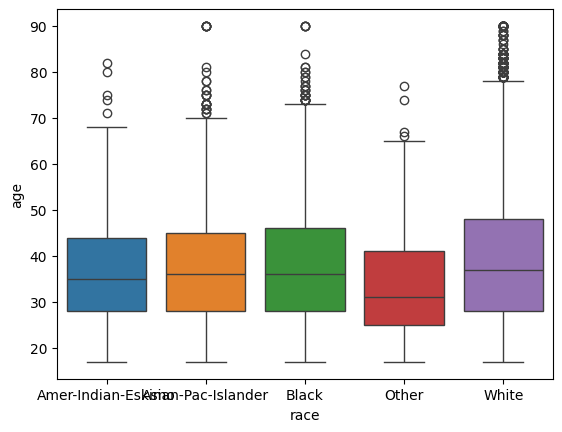

In [38]:
sns.boxplot(x='race', y='age', hue='race', data=adult_df)

<Axes: xlabel='race', ylabel='age'>

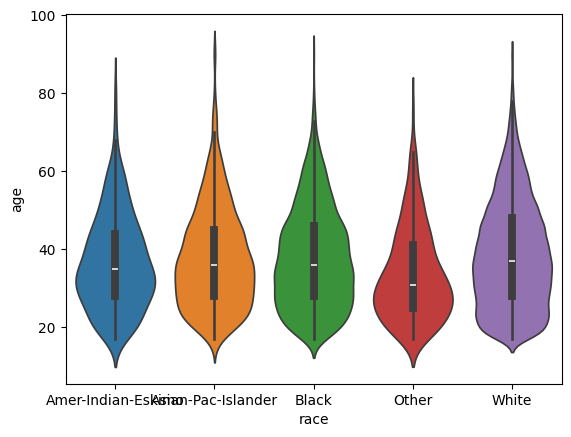

In [37]:
sns.violinplot(x='race', y='age', hue='race', data=adult_df)